## Hypothesis Testing: Impact of Benefit per Order on Shipment Delay

### Hypothesis
- **Null Hypothesis (H₀):** There is no relationship between benefit per order and shipment delay.
- **Alternative Hypothesis (H₁):** Lower benefit per order results in higher shipment delays.

### Steps Taken
1. **Load and Preprocess Data**
   - Load dataset and extract relevant columns.
   - Handle missing values.
   - Compute shipment delay as `Days for shipping (real) - Days for shipment (scheduled)`.
   - Remove negative shipment delays (cases where orders were shipped early).

2. **Exploratory Data Analysis (EDA)**
   - Compute Pearson and Spearman correlations between benefit per order and shipment delay.
   - Visualize the relationship using a scatter plot.

3. **Statistical Analysis**
   - Perform linear regression to quantify the impact of benefit per order on shipment delay.
   - Categorize orders into **high** and **low** profit groups based on median profit.
   - Conduct a T-test to compare shipment delays between high and low-profit orders.

4. **Interpret Results**
   - Analyze correlation values.
   - Check regression coefficients and p-values.
   - Evaluate statistical significance using T-test results.



Data Credits : https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis/data

In [10]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, ttest_ind
import statsmodels.api as sm



In [11]:
## This Is how we find encoding of the file, if encoding is unknown
# import chardet
# file = '..\datasets\supply_chain_01\DataCoSupplyChainDataset.csv'

# with open(file, 'rb') as f:
#     result = chardet.detect(f.read())
#     encoding = result['encoding']

# print("The file {file}, is encoded in {encoding}")

In [12]:
# Load Dataset (Assuming CSV file)
df = pd.read_csv('..\datasets\supply_chain_01\DataCoSupplyChainDataset.csv', encoding="ISO-8859-1")  # Replace with actual file path

In [13]:
# Data Preprocessing
## Handling missing values
df = df[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Order Profit Per Order']].dropna()

## Creating Shipment Delay column
df['Shipment Delay'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']

## Removing negative delays (advance shipping cases)
df = df[df['Shipment Delay'] >= 0]

In [14]:
## Checking correlation
pearson_corr, p_value = pearsonr(df['Order Profit Per Order'], df['Shipment Delay'])
spearman_corr, _ = spearmanr(df['Order Profit Per Order'], df['Shipment Delay'])
print(f"Pearson Correlation: {pearson_corr:.4f}, P-value: {p_value:.4f}")
print(f"Spearman Correlation: {spearman_corr:.4f}")

Pearson Correlation: -0.0049, P-value: 0.0715
Spearman Correlation: -0.0030


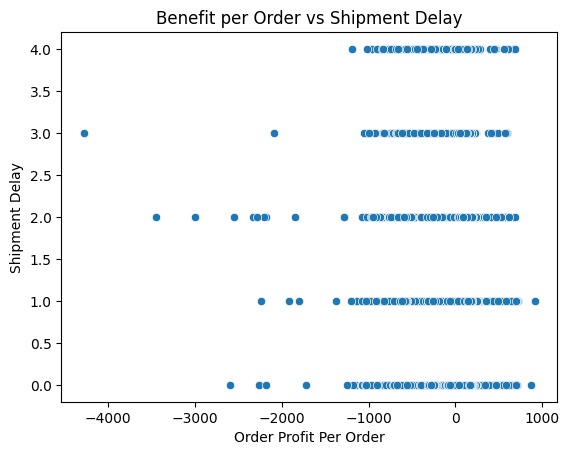

In [15]:
# Scatter Plot
sns.scatterplot(data=df, x='Order Profit Per Order', y='Shipment Delay')
plt.title("Benefit per Order vs Shipment Delay")
plt.xlabel("Order Profit Per Order")
plt.ylabel("Shipment Delay")
plt.show()

In [16]:
# Regression Analysis
X = df['Order Profit Per Order']
X = sm.add_constant(X)  # Add intercept
y = df['Shipment Delay']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Shipment Delay   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.248
Date:                Thu, 03 Apr 2025   Prob (F-statistic):             0.0715
Time:                        20:25:09   Log-Likelihood:            -1.9934e+05
No. Observations:              137153   AIC:                         3.987e+05
Df Residuals:                  137151   BIC:                         3.987e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [17]:
# Categorizing Orders into High and Low Profit (Median Split)
median_profit = df['Order Profit Per Order'].median()
df['Profit Category'] = np.where(df['Order Profit Per Order'] >= median_profit, 'High Profit', 'Low Profit')

# T-test to compare shipment delay between high and low profit orders
high_profit_delays = df[df['Profit Category'] == 'High Profit']['Shipment Delay']
low_profit_delays = df[df['Profit Category'] == 'Low Profit']['Shipment Delay']
t_stat, p_val = ttest_ind(high_profit_delays, low_profit_delays)

print(f"T-test: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")


T-test: t-statistic = -0.2321, p-value = 0.8165


## Results & Conclusion
### Key Findings
- **Correlation Analysis:**
  - **Pearson Correlation:** -0.0049 (p-value: 0.0715) → No significant linear relationship.
  - **Spearman Correlation:** -0.0030 → No meaningful rank correlation.
- **Regression Analysis:**
  - \( R^2 = 0.000 \) → Order profit has **no predictive power** over shipment delay.
- **T-test Results:**
  - **t-statistic:** -0.2321, **p-value:** 0.8165 → No significant difference in shipment delays between high and low-profit orders.

### Conclusion
- The **null hypothesis (H₀) is not rejected** since all statistical tests show **no significant relationship** between benefit per order and shipment delay.
- The assumption that **lower benefit per order causes delays is not supported by the data**.
- Other factors (e.g., **shipping mode, regional logistics, operational efficiency**) may have a stronger impact on shipment delays.